In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb
import time

In [173]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [79]:
train.describe()

,ID,para_0,para_1,para_2,para_3,para_4,para_5,para_6,para_7,para_8,...,para_41,para_42,para_43,para_44,para_45,para_46,para_47,para_48,para_49,para_50
count,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,...,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000
mean,765.000000,0.069654,0.111695,-0.009978,0.097618,0.082743,-0.015951,-0.067474,0.037059,-0.008404,...,0.013182,0.004207,-0.017619,-0.050971,-0.023989,-0.017956,-0.031104,0.059441,-0.007068,-0.057702
std,441.528595,0.947575,0.945773,0.987775,0.956611,0.934664,0.984815,0.939831,1.186972,0.930947,...,1.169319,1.400927,0.987537,1.012380,0.992718,0.986140,0.965602,0.950242,1.018283,0.962334
min,1.000000,-1.105200,-3.735600,-0.984110,-1.065200,-1.239500,-0.880580,-1.763800,-0.826370,-0.709950,...,-0.163740,-0.112290,-0.578340,-2.403700,-0.545410,-0.556780,-0.489900,-0.784590,-0.464860,-2.131800
25%,383.000000,-0.555570,-0.031557,-0.598380,-0.568180,-0.525040,-0.618170,-0.845530,-0.417770,-0.363480,...,-0.163740,-0.112290,-0.578340,-0.562050,-0.545410,-0.556780,-0.489900,-0.561970,-0.464860,-0.293410
50%,765.000000,-0.175470,0.425360,-0.474750,-0.221150,-0.159160,-0.302150,0.234560,-0.281570,-0.200400,...,-0.163740,-0.112290,-0.511910,0.020510,-0.431850,-0.502570,-0.440060,-0.284940,-0.305720,0.196740
75%,1147.000000,0.644920,0.831520,0.256640,0.669570,0.562390,0.047707,0.629630,0.399430,0.181220,...,-0.163740,0.026975,-0.162090,0.990180,-0.170860,-0.209800,-0.254480,0.097298,0.088735,0.640380
max,1529.000000,2.009400,0.831520,2.738100,2.644800,2.366200,5.822100,1.413400,32.270000,11.019000,...,30.596000,54.273000,2.411100,0.990180,3.457600,2.479300,3.298200,2.257900,9.561500,0.932190


In [80]:
train.head()

,ID,para_0,para_1,para_2,para_3,para_4,para_5,para_6,para_7,para_8,...,para_42,para_43,para_44,para_45,para_46,para_47,para_48,para_49,para_50,Result
0,1,0.97122,0.83152,-0.57052,0.99590,0.762820,0.032973,-0.69248,-0.55397,-0.473470,...,-0.112290,0.12326,0.990180,-0.50457,0.12478,0.36049,-0.10158,-0.36256,0.21309,h0
1,2,-0.47565,0.43977,-0.50892,-0.35476,-0.435490,-0.618170,0.62963,-0.28157,-0.229950,...,0.026975,-0.55423,0.004867,-0.28715,-0.55678,-0.48990,-0.56377,-0.22229,0.63568,h0
2,3,-0.48641,-0.26590,-0.71295,-0.42638,-0.022972,-0.336080,0.15184,-0.28157,-0.227910,...,0.026975,-0.46864,-1.242700,-0.49820,-0.47720,-0.41047,0.22427,-0.21519,-0.16009,h3
3,4,-0.99236,-1.06970,-0.87621,-0.98453,-0.091183,-0.701840,0.35559,0.26323,0.138290,...,0.096610,-0.41310,-1.244000,-0.53871,-0.41947,-0.31858,0.63729,-0.21295,-0.57671,h0
4,5,-0.45878,-0.55809,-0.28180,-0.50519,-0.424630,0.050215,0.35867,0.67183,0.045001,...,0.305510,-0.57834,-1.519900,-0.46202,-0.55678,-0.48990,-0.27750,-0.46486,0.42153,h0


# Checking highly correlated variables

In [129]:
#Checking pair of Variables which has correlation greater than or less than 0.9
for i in range(51):
  for j in range(i, 51):
    k = np.corrcoef(train.iloc[:,i],train.iloc[:,j])
    y = int(k[0][1])
    if ((y>0.9 or y<-0.9) and i!=j):
      print(train.columns[i],train.columns[j])

para_13 para_31


we can see, only para_13 and para_31 are highly correlated.

# Model Building

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [174]:
X = train.drop(['Result', 'ID'], axis = 1)
y = train['Result']

In [169]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 7)

# Logistic regression

In [151]:
#Calculating accuracy on training set.
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
pred_test = model.predict(X_train)
score = accuracy_score(y_train,pred_test)
print('accuracy_score',score)

accuracy_score 0.5296684118673648


In [216]:
#Calculating accuracy on validation set.
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
pred_test = model.predict(X_valid)
score = accuracy_score(y_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.3838120104438642


As, we can see model is overfitting so we will use l2 regualrization ('ridge') as we have checked all the variables are important.

In [155]:
model = LogisticRegression(random_state=1, penalty = 'l2')
model.fit(X_train, y_train)
pred_test = model.predict(X_valid)
score = accuracy_score(y_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.45430809399477806


There is not much increase in the accuracy. so we will be going with random forest classsifier as it works well in the overfitting case.

# Random Forecast Classifier

In [141]:
#Calculating accuracy on training set.
model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=20)
model.fit(X_train, y_train)
pred_test = model.predict(X_train)
score = accuracy_score(y_train,pred_test)
print('accuracy_score',score)

accuracy_score 0.587260034904014


In [142]:
#Calculating accuracy on validation set.
model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=20)
model.fit(X_train, y_train)
pred_test = model.predict(X_valid)
score = accuracy_score(y_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.4856396866840731


as we can see there is increase in the accuracy and overfitting is still there, so we will be trying feature selection using feature importances property of random forest classfier

In [143]:
# Applying 5 Fold cross validation technique with random forest.
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=100, max_depth=400, n_estimators=40)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(X)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.5357142857142857

2 of kfold 5
accuracy_score 0.5504885993485342

3 of kfold 5
accuracy_score 0.5751633986928104

4 of kfold 5
accuracy_score 0.521311475409836

5 of kfold 5
accuracy_score 0.5346534653465347


In [144]:
#Applying feature importances property of RFC and selecting best features.
X1 = list(zip(model.feature_importances_, np.array(train.columns)))

In [189]:
X1.sort(reverse = True)
X1[:5]

[(0.03813828025333833, 'para_13'),
 (0.03778998294847527, 'para_11'),
 (0.032897440703864564, 'para_23'),
 (0.031793437252071295, 'para_25'),
 (0.031433537064833206, 'para_15')]

In [190]:
feature = []
for i in range(20):
    feature.append(X1[i][1])
feature[:5]

['para_13', 'para_11', 'para_23', 'para_25', 'para_15']

In [148]:
df1 = train[feature]

In [149]:
df1.head()

,para_13,para_11,para_23,para_25,para_15,para_21,para_3,para_27,para_35,para_17,para_9,para_1,para_2,para_37,para_7,para_43,para_14,para_29,para_10,para_5
0,-1.03800,-0.34908,-0.271410,0.42440,0.35957,0.335740,0.99590,-0.091193,-0.35232,0.586730,-0.09707,0.83152,-0.57052,-0.340320,-0.55397,0.12326,-0.192460,-0.44033,1.39640,0.032973
1,0.65202,1.36080,-0.304380,0.18967,0.57901,0.020912,-0.35476,-0.088506,-0.22369,0.586730,2.35250,0.43977,-0.50892,-0.262150,-0.28157,-0.55423,-0.115130,-0.24267,1.23590,-0.618170
2,0.45319,1.36080,-0.477500,-0.91991,-1.20690,-1.653900,-0.42638,-0.118230,-0.35232,0.020298,2.35250,-0.26590,-0.71295,1.786300,-0.28157,-0.46864,-0.029048,-0.24267,0.58322,-0.336080
3,0.75143,-0.25672,0.003369,-0.24367,-1.03100,0.020912,-0.98453,-0.111510,-0.35232,-0.042639,-0.64141,-1.06970,-0.87621,0.839770,0.26323,-0.41310,-0.141110,-0.44033,-0.44791,-0.701840
4,0.35378,-0.23825,0.003369,0.18967,0.88399,0.020912,-0.50519,-0.103500,-0.35232,0.586730,-0.64141,-0.55809,-0.28180,-0.056837,0.67183,-0.57834,-0.157740,-0.24267,-0.64092,0.050215


In [157]:
df1X_train, df1X_valid, df1y_train, df1y_valid = train_test_split(df1,y,random_state = 7)

In [160]:
#Calculating accuracy on training set.
model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=20)
model.fit(df1X_train, df1y_train)
pred_test = model.predict(df1X_train)
score = accuracy_score(df1y_train,pred_test)
print('accuracy_score',score)

accuracy_score 0.5863874345549738


In [161]:
#Calculating accuracy on validation set.
model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=20)
model.fit(df1X_train, df1y_train)
pred_test = model.predict(df1X_valid)
score = accuracy_score(df1y_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.48825065274151436


In [164]:
#Applying 5 fold cross vaidation technique with RFC
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(df1,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = df1.loc[train_index],df1.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=100, max_depth=400, n_estimators=40)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(df1)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.551948051948052

2 of kfold 5
accuracy_score 0.5798045602605864

3 of kfold 5
accuracy_score 0.5784313725490197

4 of kfold 5
accuracy_score 0.49836065573770494

5 of kfold 5
accuracy_score 0.528052805280528


RFC 'feature importances' property of Feature selection also not much helped in increasing accuracy. so we will try to go with PCA approach.

# Principal Component analysis

In [171]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [175]:
df = pd.concat([principalDf, train[['Result']]], axis = 1)

In [176]:
df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Result
0,1.511483,-0.868745,-1.312190,1.745070,0.908720,h0
1,-1.557520,-1.196824,0.483303,1.302437,-1.287330,h0
2,-1.242277,-0.786971,0.588879,-0.681749,0.167333,h3
3,-1.023769,-0.284157,0.837121,-1.514676,-0.680368,h0
4,-1.573470,-0.773423,1.629689,0.185221,-0.551976,h0


In [178]:
dfX = df.drop(['Result'], axis = 1)
dfy = df['Result']

In [179]:
dfX_train, dfX_valid, dfy_train, dfy_valid = train_test_split(dfX,dfy,random_state = 7)

In [181]:
#Calculating accuracy on training set.
model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=20)
model.fit(dfX_train, dfy_train)
pred_test = model.predict(dfX_train)
score = accuracy_score(dfy_train,pred_test)
print('accuracy_score',score)

accuracy_score 0.5715532286212914


In [180]:
#Calculating accuracy on vaidation set.
model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=20)
model.fit(dfX_train, dfy_train)
pred_test = model.predict(dfX_valid)
score = accuracy_score(dfy_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.42036553524804177


we can see that after applying PCA it decreases our accuracy and it was not an efficient approach. so i have tried one more algorithm LightGBM

# Light Gradient Boosting 

In [182]:
reg = lgb.LGBMClassifier(boosting_type="rf",
                         num_leaves=165,
                         colsample_bytree=.5,
                         n_estimators=400,
                         min_child_weight=5,
                         min_child_samples=10,
                         subsample=.632, # Standard RF bagging fraction
                         subsample_freq=1,
                         min_split_gain=0,
                         reg_alpha=10, # Hard L1 regularization
                         reg_lambda=0,
                         n_jobs=3)

In [183]:
#applying 5 fold cross vaildation technique with LightGBM
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
     
    reg.fit(xtr, ytr)
    pred_test = reg.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
accuracy_score 0.44805194805194803

2 of kfold 5
accuracy_score 0.42671009771986973

3 of kfold 5
accuracy_score 0.4542483660130719

4 of kfold 5
accuracy_score 0.4426229508196721

5 of kfold 5
accuracy_score 0.43234323432343236


In [186]:
#Calculating accuracy on training set.
reg.fit(X_train, y_train)
pred_test = reg.predict(X_train)
score = accuracy_score(y_train,pred_test)
print('accuracy_score',score)

accuracy_score 0.4607329842931937


In [187]:
#Calculating accuracy on validation set.
reg.fit(X_train, y_train)
pred_test = reg.predict(X_valid)
score = accuracy_score(y_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.3968668407310705


as we can see, it has also decreased our accuracy than before.

# PCA with SVM

              precision    recall  f1-score   support

          h0       0.53      0.81      0.64       144
          h1       0.38      0.23      0.28        71
          h2       0.29      0.11      0.16        35
          h3       0.44      0.37      0.40        49
          h4       0.60      0.06      0.11        48
          h5       0.29      0.50      0.36        36

    accuracy                           0.46       383
   macro avg       0.42      0.35      0.33       383
weighted avg       0.46      0.46      0.41       383



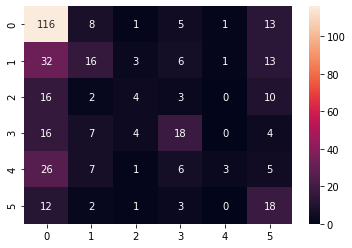

In [191]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pca = PCA()
clf = svm.SVC(kernel='linear')

pca_svm = make_pipeline(pca, clf)

pca_svm.fit(X_train, y_train)

y_pred = pca_svm.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred)

print(classification_report(y_valid, y_pred))
sns.heatmap(cm,annot=True,fmt="d")

As, we earlier seen that there is no linear relationship by correlation coefficient, so there can be non linear relationship. therefore applying t-SNE.

# t-SNE

In [193]:
train.drop(['Result', 'ID'], axis = 1, inplace = True)

In [194]:
#Converting dataframe to array.
train = train.to_numpy()

In [195]:
#Standardizing the array with the standard scalar property.
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(train)
print(standardized_data.shape)

(1529, 51)


In [196]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0,perplexity = 50)

In [197]:
tsne_data = model.fit_transform(standardized_data)

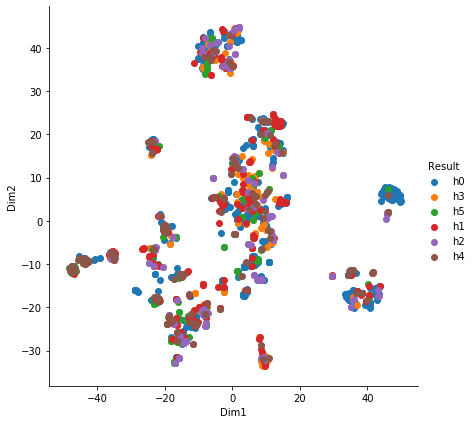

In [199]:
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "Result"))
tsne_df
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Result", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [200]:
tsne_df.head()

,Dim1,Dim2,Result
0,9.37499,23.2929,h0
1,36.658,-19.1467,h0
2,45.988,1.9625,h3
3,3.24447,-16.9287,h0
4,6.37432,-8.36117,h0


In [208]:
Xt = tsne_df.drop(['Result'], axis = 1)
yt = tsne_df['Result']

In [209]:
Xt_train,Xt_valid,yt_train,yt_valid = train_test_split(Xt,yt,random_state = 7)

In [210]:
#Calculating accuracy on validation set.
model = RandomForestClassifier(random_state=100, max_depth=4, n_estimators=20)
model.fit(Xt_train, yt_train)
pred_test = model.predict(Xt_valid)
score = accuracy_score(yt_valid,pred_test)
print('accuracy_score',score)

accuracy_score 0.4595300261096606


In [211]:
#Calculating accuracy on training set.
model = RandomForestClassifier(random_state=100, max_depth=4, n_estimators=20)
model.fit(Xt_train, yt_train)
pred_test = model.predict(Xt_train)
score = accuracy_score(yt_train,pred_test)
print('accuracy_score',score)

accuracy_score 0.5
